In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def sigmoid(x):
  return 1/(1+np.exp(-x))

def F(w):
  return sum((sigmoid(w.dot(x)) - y)**2 for x, y in points)/len(x)

def dF(w):
  return sum(2*x*(sigmoid(w.dot(x))-y)*(sigmoid(w.dot(x))*(1-sigmoid(w.dot(x)))) for x, y in points)/len(x)
  
def gradient(w, iters, eta = 0.1):
  li = []
  for i in range(iters):
    cost = F(w)
    li.append(cost)
    grad = dF(w)
    w = w - eta*grad
  print("Cost ", cost)
  return w, li

data = pd.read_csv("election_dataset.csv")
y = data['clinton_win'].values

data = data.drop("clinton_win", axis=1)
data = data.drop("state", axis=1)
data = data.drop("county_name", axis=1)

data = (data-data.min())/(data.max()-data.min())
x = np.array(data[['median_age', 'mean_savings', 'per_capita_income', 'population_density', 'percent_in_nursing_homes', 'crime_index_PC', 'mean_savings', 'percent_in_poverty', 'percent_female']])

points = []
for i in range(len(x)):
  points.append((x[i], y[i]))



In [ ]:
w = np.zeros(x.shape[1])
W, loss1 = gradient(w, 10000, 0.01)

Cost  0.2429173857754035


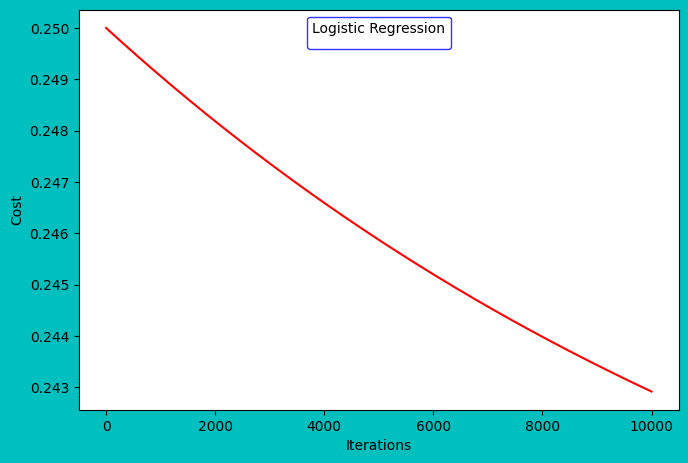

In [ ]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(10000),loss1,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Logistic Regression')

In [ ]:
w = np.random.rand(x.shape[1])
W, loss2 = gradient(w, 10000, 0.01)

Cost  0.24336967116849167


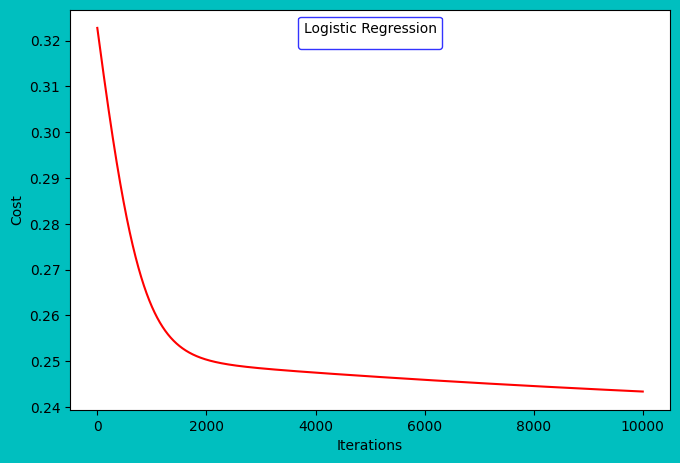

In [ ]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(10000),loss2,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Logistic Regression')

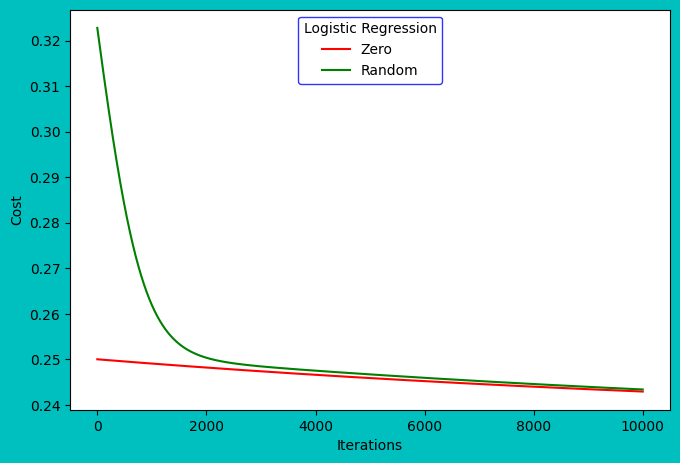

In [ ]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(10000),loss1,color='r')
plt.plot(np.arange(10000),loss2,color='g')
plt.legend(['Zero','Random'],facecolor='white',loc='upper center', edgecolor='b', title='Logistic Regression')

In [ ]:
w = np.zeros(x.shape[1])
W, l1 = gradient(w, 1000, 0.1)
W, l2 = gradient(w, 1000, 0.05)
W, l3 = gradient(w, 1000, 0.01)
W, l4 = gradient(w, 1000, 0.005)
W, l5 = gradient(w, 1000, 0.001)

Cost  0.24292113057494258
Cost  0.24587560920336118
Cost  0.24906137946197976
Cost  0.24952246760408742
Cost  0.24990306863749118


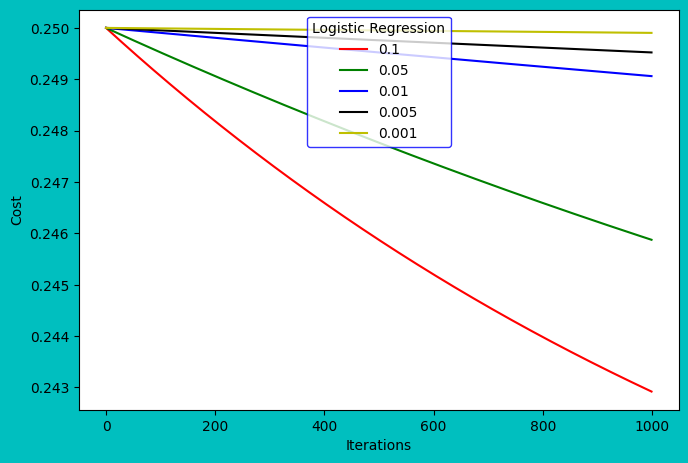

In [ ]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(1000),l1,color='r')
plt.plot(np.arange(1000),l2,color='g')
plt.plot(np.arange(1000),l3,color='b')
plt.plot(np.arange(1000),l4,color='black')
plt.plot(np.arange(1000),l5,color='y')
plt.legend(['0.1','0.05','0.01','0.005','0.001'],facecolor='white',loc='upper center', edgecolor='b', title='Logistic Regression')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x = X_train
y = y_train
points = []
for i in range(len(x)):
  points.append((x[i], y[i]))

In [ ]:
W, ls = gradient(w, 1000, 0.1)
W

Cost  0.24224335423775187


array([-0.0253397 , -0.1291134 , -0.46353015,  0.04485874,  0.00203299,
        0.02839013, -0.1291134 ,  0.70946119,  0.04879104])

In [ ]:
def prediction(x, w):
  res = []
  for i in x:
    if sigmoid(i.dot(w)) >= 0.5:
      res.append(1)
    else:
      res.append(0)
  return res

In [ ]:
results = prediction(X_test, W)
print(results)
accuracy_score(y_test, results)

[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 

0.5548654244306418